In [1]:
#!pip show plotnine

In [2]:
#!pip show missingno

In [3]:
# warning 메시지 출력 x
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from plotnine import *

In [5]:
# 한글 폰트 적용
plt.rcParams["font.family"] = 'NanumBarunGothic'

In [6]:
# 현재 위치정보 출력
%pwd

'/d/GIT/jupyter-notebook/open_data_wrangling'

In [7]:
# data 폴더 아래에 데이터 출력
%ls data/apt_price/

'전국 평균 분양가격(2013년 9월부터 2015년 12월까지).csv'*
'주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'*


In [8]:
pre_sale = pd.read_csv('data/apt_price/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='euc-kr')
pre_sale.shape

(4335, 5)

In [9]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [10]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [11]:
# 데이터 요약 정보 출력
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [12]:
# 데이터 타입 정보 출력
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [13]:
# 결측치 확인
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

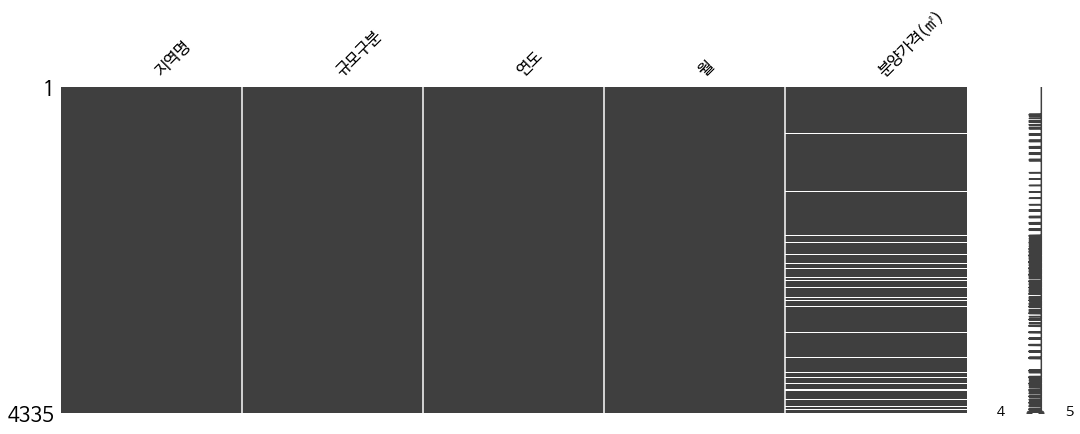

In [14]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18, 6));

In [15]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [16]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [17]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양 가격 구하기
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [18]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null object
월          4335 non-null object
분양가격(㎡)    4058 non-null object
분양가격       3957 non-null float64
평당분양가격     3957 non-null float64
dtypes: float64(2), object(5)
memory usage: 237.2+ KB


In [19]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [20]:
# 분양가격에 결측치 파악
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
분양가격       378
평당분양가격     378
dtype: int64

In [21]:
pre_sale.describe()

,분양가격,평당분양가격
count,3957.000000,3957.000000
mean,3238.128633,10685.824488
std,1264.309933,4172.222780
min,1868.000000,6164.400000
25%,2441.000000,8055.300000
50%,2874.000000,9484.200000
75%,3561.000000,11751.300000
max,12728.000000,42002.400000


In [22]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4335,4335,4335,4335,4058
unique,17,5,5,12,1753
top,인천,전체,2019,12,2221
freq,255,867,1020,425,17


In [23]:
# 2017년 데이터만 보기
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [24]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어있음
pre_sale['규모구분'].value_counts()

전체                   867
전용면적 102㎡초과          867
전용면적 85㎡초과 102㎡이하    867
전용면적 60㎡이하           867
전용면적 60㎡초과 85㎡이하     867
Name: 규모구분, dtype: int64

In [25]:
pre_sale['지역명'].value_counts()

인천    255
부산    255
경남    255
광주    255
충남    255
대전    255
경기    255
대구    255
충북    255
서울    255
경북    255
전남    255
세종    255
강원    255
제주    255
울산    255
전북    255
Name: 지역명, dtype: int64

## 전국평균 분양가격
- groupby와 pivot_table 사용하기

In [26]:
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도)['평당분양가격'].describe().T

연도,2015,2016,2017,2018,2019
count,243,984,899,919,912
mean,"9,203","9,683","10,360","10,979","12,188"
std,"3,224","3,536","3,655","3,914","5,159"
min,"6,164","6,270","6,521","6,851","7,009"
25%,"7,342","7,531","7,804","8,332","8,697"
50%,"8,303","8,818","9,402","9,742","11,204"
75%,"9,984","10,390","11,405","12,203","13,419"
max,"23,404","26,717","26,027","26,723","42,002"


## 규모별 전국 평균 분양가격

In [27]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","13,332"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,507"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,677"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","12,981"
전체,"8,893","9,293","9,901","10,676","11,603"


## 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봄

In [28]:
# 규모구분에서 전체로 되어있는 데이터만 가져옴
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019
0,강원,"7,160","7,011","7,127","7,681","8,142"
1,경기,"10,377","11,220","11,850","13,186","14,469"
2,경남,"7,586","7,848","8,120","9,019","9,871"
3,경북,"7,171","7,361","7,795","8,505","8,857"
4,광주,"8,052","8,899","9,464","9,856","11,823"
5,대구,"9,232","10,310","11,456","12,076","13,852"
6,대전,"8,098","8,502","9,045","10,180","11,778"
7,부산,"10,307","10,430","11,578","12,998","13,116"
8,서울,"19,725","20,663","21,376","22,889","26,131"
9,세종,"8,750","8,860","9,135","10,355","11,079"


In [29]:
region_year['변동액'] = (region_year['2019'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액']) * 1000
min_delta_price = np.min(region_year['변동액']) * 1000
mean_delta_price = np.mean(region_year['변동액']) * 1000

print(f'2015년부터 2019년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 서울이며 상승액은 평당 {max_delta_price:,.0f}원이다')
print(f'상승액이 가장 작은 지역은 울산이며 평당 {min_delta_price:,.0f}원이다')
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print(f'전국 평균 변동액은 평당 {mean_delta_price:,.0f}원이다.')

region_year

2015년부터 2019년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 서울이며 상승액은 평당 6,405,000원이다
상승액이 가장 작은 지역은 울산이며 평당 -30,000원이다
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 2,647,235원이다.


연도,지역명,2015,2016,2017,2018,2019,변동액
0,강원,"7,160","7,011","7,127","7,681","8,142",981
1,경기,"10,377","11,220","11,850","13,186","14,469",4091
2,경남,"7,586","7,848","8,120","9,019","9,871",2285
3,경북,"7,171","7,361","7,795","8,505","8,857",1685
4,광주,"8,052","8,899","9,464","9,856","11,823",3770
5,대구,"9,232","10,310","11,456","12,076","13,852",4619
6,대전,"8,098","8,502","9,045","10,180","11,778",3679
7,부산,"10,307","10,430","11,578","12,998","13,116",2809
8,서울,"19,725","20,663","21,376","22,889","26,131",6405
9,세종,"8,750","8,860","9,135","10,355","11,079",2328


## 시각화

### 이럴 때 이런 시각화
- [분류:통계 차트와 다이어그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B6%84%EB%A5%98:%ED%86%B5%EA%B3%84_%EC%B0%A8%ED%8A%B8%EC%99%80_%EB%8B%A4%EC%9D%B4%EC%96%B4%EA%B7%B8%EB%9E%A8)

### Pandas 로 시각화 하기
- 공식 문서 : [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### Seaborn으로 시각화 하기
- 공식 문서 : [seaborn: statistical data visualization](https://seaborn.pydata.org/)

## 연도별 변동 그래프
- 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
- 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요함
- 한글폰트를 지정해 주지 않는다면 글자가 두부모양으로 깨져보이게 됨

In [30]:
import seaborn as sns
# 아래의 코드로 스타일을 지정해 주면 폰트 설정이 초기화 됨
# 따라서, 폰트설정은 스타일 지정 이후에 해주어야 함
sns.set_style('whitegrid')

In [31]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 막대그래프
- 막대 그래프(-graph), 바 차트(bar chart), 바 그래프(bar graph)는 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프를 말한다. 막대는 수직으로나 수평으로 그릴 수 있다. 수직 막대 그래프는 선 그래프 또는 라인 그래프(line graph)라고도 한다

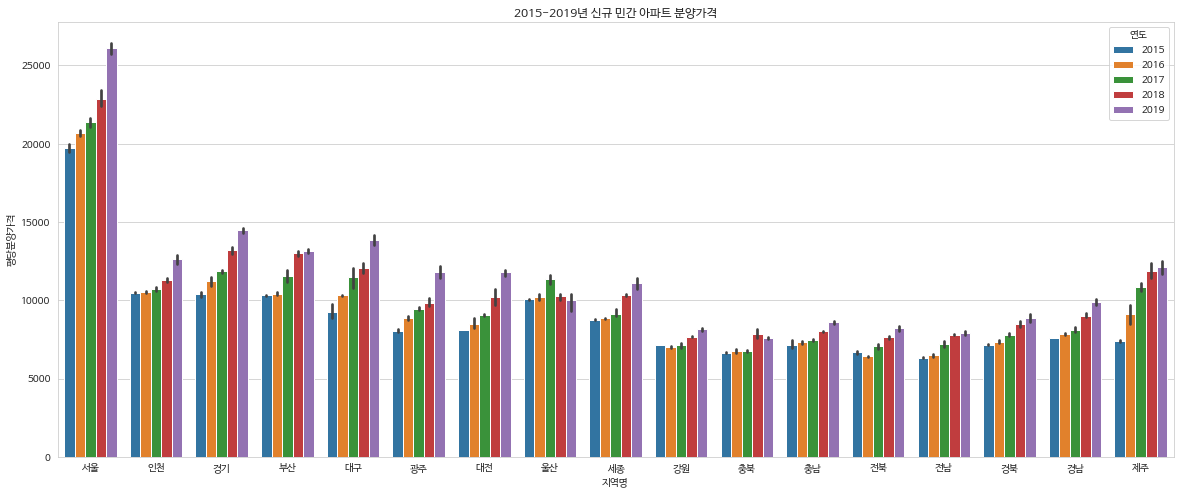

In [32]:
plt.figure(figsize=(20, 8))
plt.title('2015-2019년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', hue='연도');

In [33]:
df_year_region = pd.pivot_table(region_year_all,
                                index='지역명', columns='연도', values='평당분양가격')
df_year_region.sample(3)

연도,2015,2016,2017,2018,2019
지역명,,,,,
전북,"6,703","6,418","7,058","7,626","8,197"
충남,"7,115","7,331","7,456","8,013","8,607"
인천,"10,484","10,532","10,737","11,274","12,635"


In [34]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018', '2019'], dtype='object', name='연도')

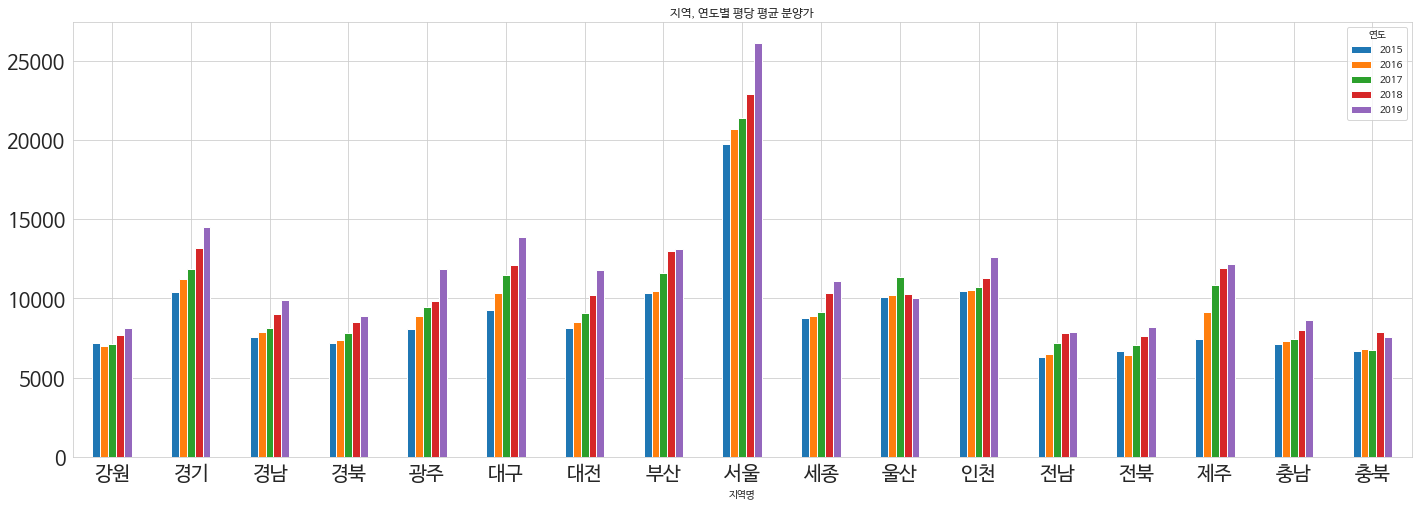

In [35]:
df_year_region.plot.bar(figsize=(24, 8),
                        grid=True, fontsize=20, rot=0,
                        title='지역, 연도별 평당 평균 분양가');

### 규모별
- seaborn의 barplot은 기본값을 평균으로 구합니다.
- 각각의 막대 그래프 상단에 있는 검은색 선은 신뢰구간을 의미합니다.
- 통계학에서 신뢰 구간(confidence interval)은 모수가 어느 범위 안에 있는지를 확률적으로 보여주는 방법이다.
- seaborn의 barplot 옵션 중 ci가 이 신뢰구간을 의미하며 기본값은 95입니다.
- 표본의 95%의 데이터가 검은색 선 안에 위치하고 있음을 알 수 있습니다.
- 나머지 5%의 데이터는 이 표본을 벗어나는 데이터로 너무 크거나 작은 데이터를 제외하고 볼 수 있습니다.
- 따라서 이 검은색 선을 벗어나는 데이터는 이상치(outlier)로 볼 수 있습니다.

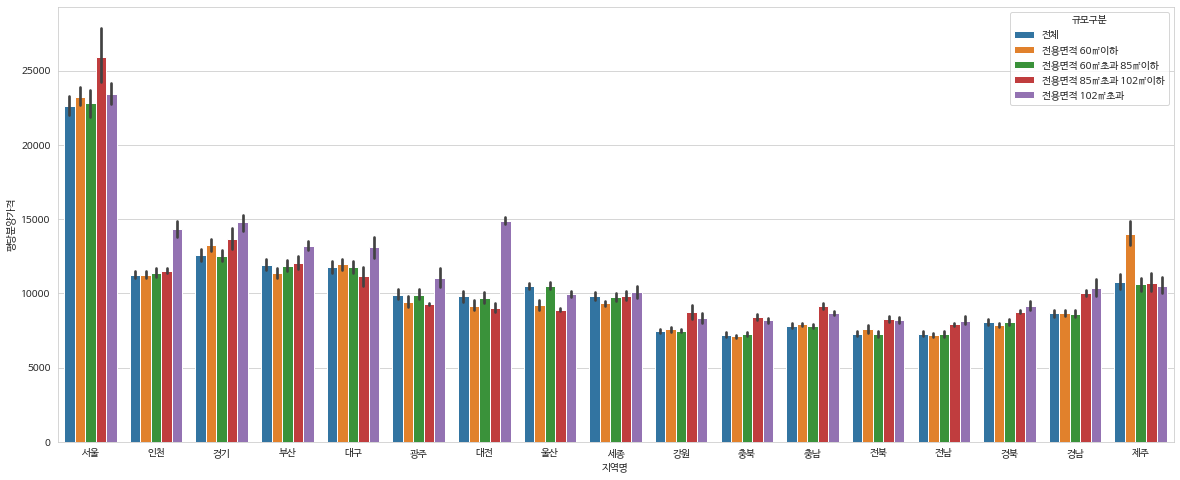

In [37]:
# seaborn으로 지역, 규모별 평당 분양 가격
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분');

### 지역별 평당 분양가격 합계
- 아래 데이터로 규모(제곱미터)에 따른 평당 분양가격을 봄

In [39]:
pre_sale_size = pre_sale.pivot_table(values='평당분양가격', index='지역명', columns='규모구분')
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
대구,"13,087","11,992","11,779","11,141","11,771"
인천,"14,362","11,241","11,384","11,528","11,257"
강원,"8,311","7,567","7,486","8,750","7,478"


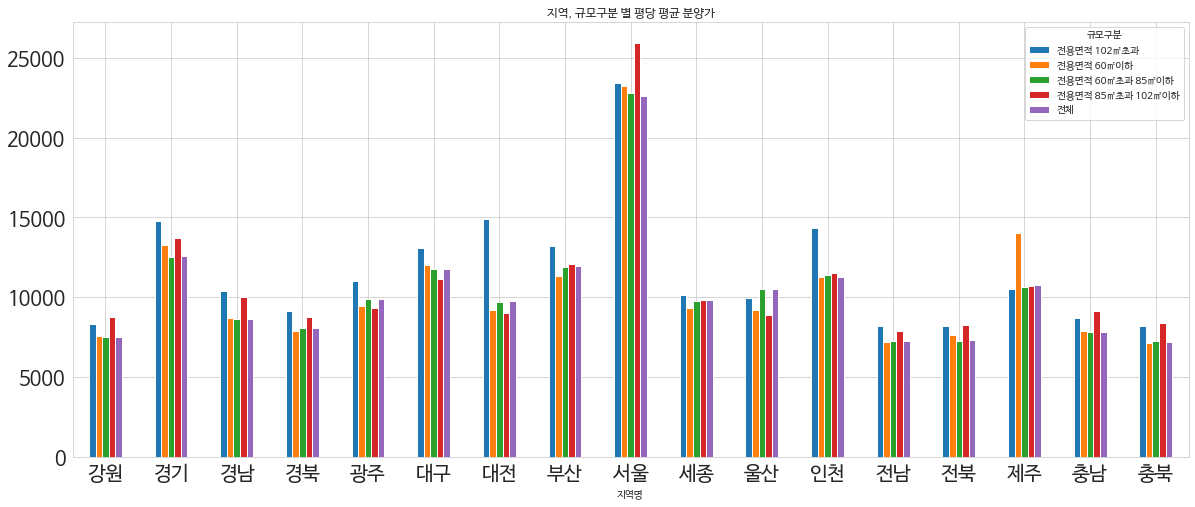

In [42]:
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가',
                       figsize=(20, 8), grid=True, fontsize=20, rot=0);

In [60]:
# 대전 데이터 보기 -> 결측치가 많음
pre_sale_temp = pre_sale[(pre_sale['지역명'] == '대전') & (pre_sale['규모구분'] == '전용면적 102㎡초과')]
print(f"{pre_sale_temp['평당분양가격'].isnull().sum()} / {pre_sale_temp['평당분양가격'].count()} ")

23 / 28 


In [61]:
pre_sale_size_t = pre_sale_size.T
pre_sale_size_t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"8,311","14,772","10,358","9,157","11,042","13,087","14,877","13,208","23,446","10,107","9,974","14,362","8,168","8,194","10,523","8,689","8,195"
전용면적 60㎡이하,"7,567","13,252","8,689","7,883","9,431","11,992","9,176","11,354","23,213","9,324","9,202","11,241","7,210","7,610","14,022","7,911","7,103"
전용면적 60㎡초과 85㎡이하,"7,486","12,524","8,619","8,061","9,911","11,779","9,711","11,865","22,787","9,775","10,503","11,384","7,269","7,271","10,621","7,819","7,264"
전용면적 85㎡초과 102㎡이하,"8,750","13,678","10,018","8,774","9,296","11,141","9,037","12,073","25,944","9,848","8,861","11,528","7,909","8,276","10,709","9,120","8,391"
전체,"7,478","12,560","8,659","8,079","9,904","11,771","9,786","11,936","22,610","9,805","10,493","11,257","7,284","7,293","10,785","7,815","7,219"


### 전국 규모(면적)별 신규 민간 아파트 분양가격

In [62]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
3979,전남,전용면적 102㎡초과,2019,8,3003,"3,003","9,910"


In [63]:
pre_sale[['지역명', '평당분양가격', '규모구분']].sample(3)

,지역명,평당분양가격,규모구분
1202,경기,"11,576",전용면적 60㎡초과 85㎡이하
1153,강원,"6,702",전용면적 85㎡초과 102㎡이하
593,제주,"8,992",전용면적 85㎡초과 102㎡이하


In [68]:
pre_sale.shape

(4335, 7)

In [64]:
# 결측치 확인
pre_sale['평당분양가격'].isnull().sum()

378

In [76]:
# 결측치가 있으면 제대로 된 시각화를 할 수 없기 때문에 drop 합니다
pre_sale.dropna(subset=['평당분양가격'], inplace=True, axis=0)

In [77]:
# 결측치 확인
pre_sale['평당분양가격'].isnull().sum()

0

In [78]:
pre_sale.shape

(3957, 7)

In [79]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [80]:
# 수치형 데이터로 변경
pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)

In [81]:
# 0인 데이터가 있는지 확인
pre_sale[pre_sale['평당분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격


In [82]:
pre_sale['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [83]:
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
충남,"8,689","7,911","7,819","9,120","7,815"
대전,"14,877","9,176","9,711","9,037","9,786"
대구,"13,087","11,992","11,779","11,141","11,771"


### box-and-whisker plot | diagram
- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수()
5. 최댓값
6. Box plot 이해하기: [Understanding Boxplots - Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

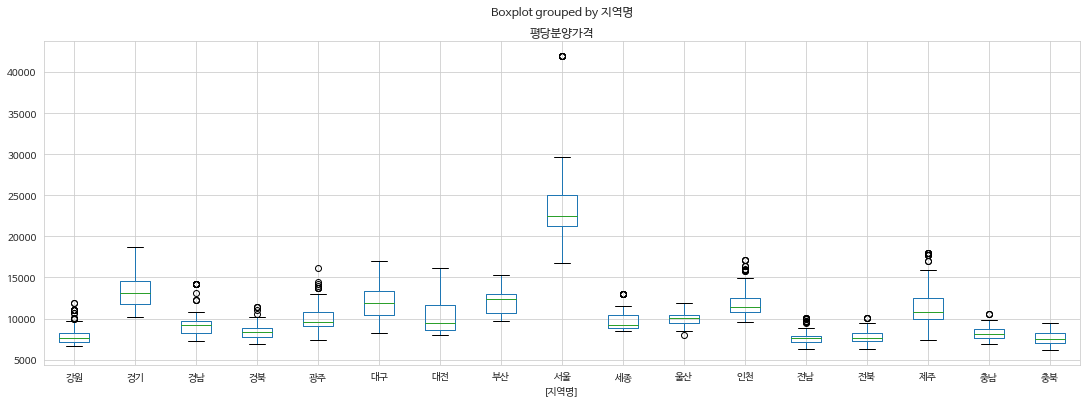

In [85]:
# 지역별 평당 분양가격
pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18, 6));

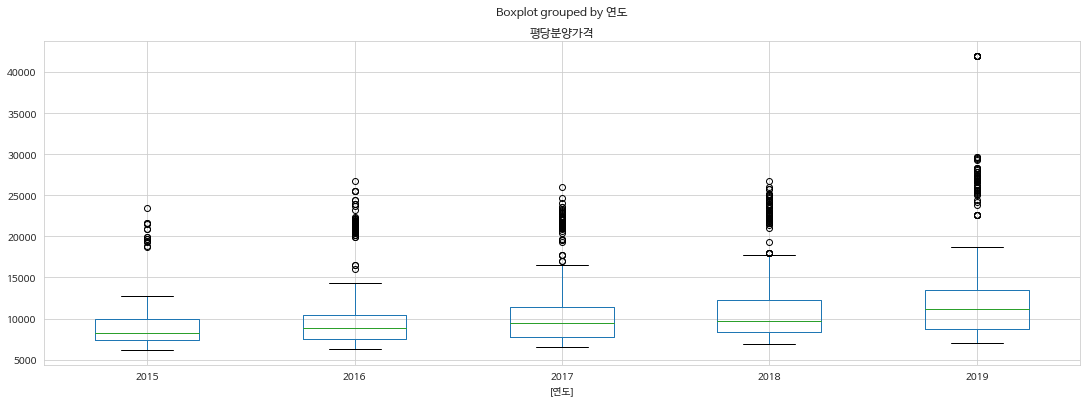

In [88]:
# 년도별 평당 분양가격
pre_sale[['연도', '평당분양가격']].boxplot(by=['연도'], figsize=(18, 6))

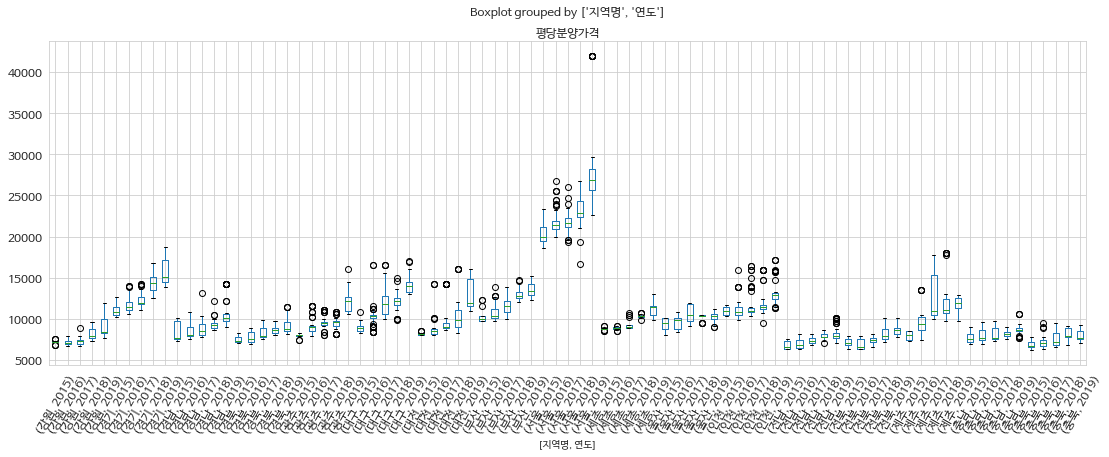

In [90]:
# 연도와 지역별로 평당분양가격
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18, 6),
    fontsize=12,
    rot=60);

In [91]:
# 서울 데이터
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']

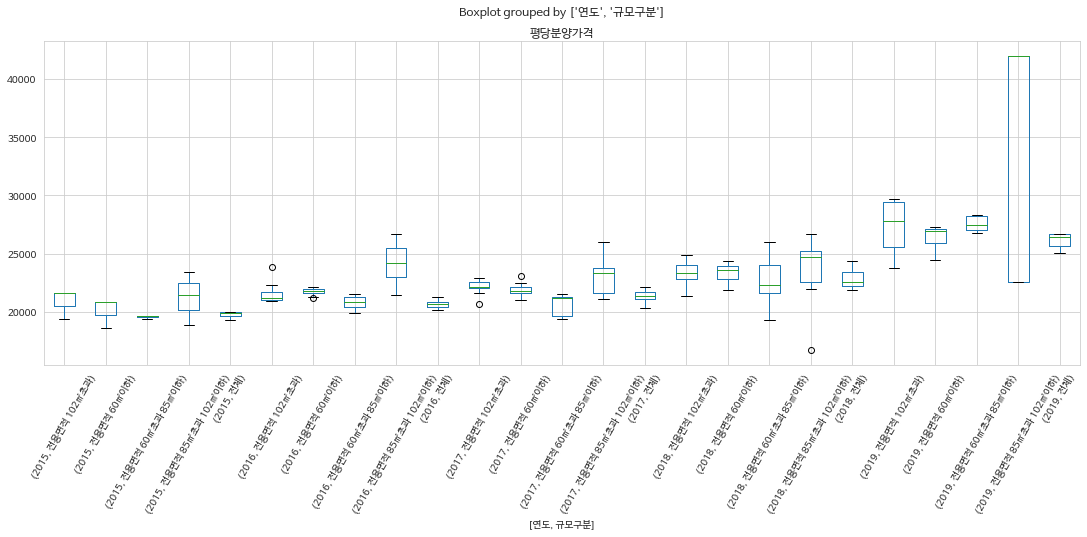

In [96]:
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=60);

In [97]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']

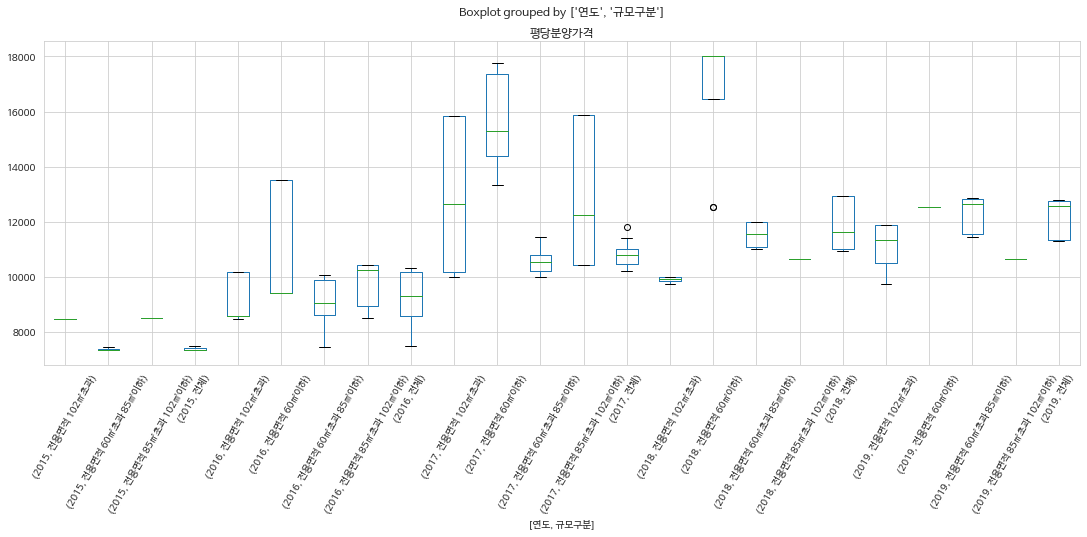

In [103]:
pre_sale_jeju[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=60);

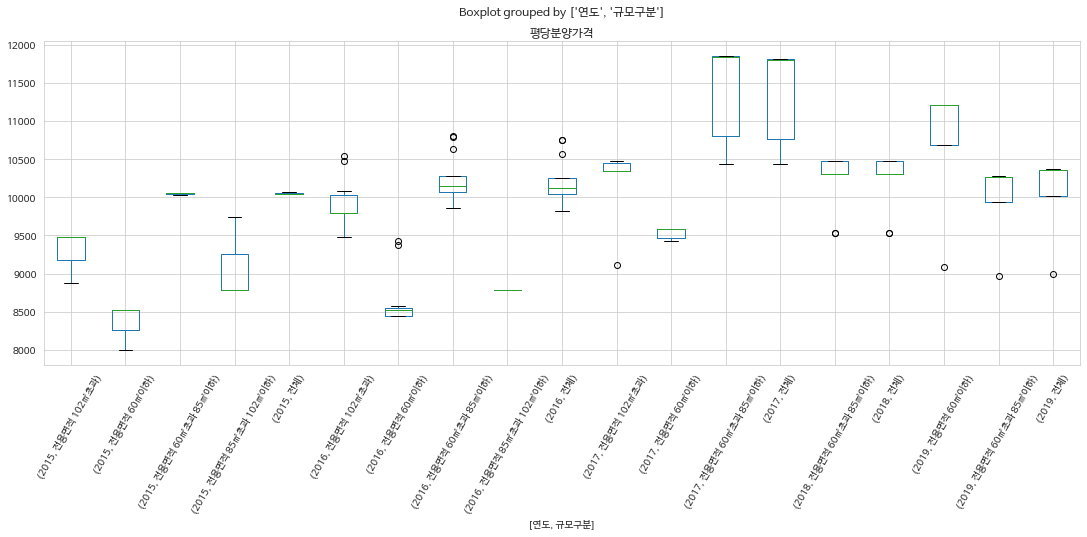

In [105]:
pre_sale_ulsan = pre_sale[pre_sale['지역명'] == '울산']
pre_sale_ulsan[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=60);

### Tidy Data 만들기
- [Tidy data - Wikipedia](https://en.wikipedia.org/wiki/Tidy_data)

In [135]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv',
                 encoding='euc-kr', skiprows=1, header=0)
df.shape

(23, 27)

In [136]:
year = df.iloc[0]
month = df.iloc[1]

In [137]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다
for i, y in enumerate(year):
    if 2 < i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2:
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [138]:
df.columns = year

In [139]:
df = df.drop(df.index[[0, 1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [145]:
# 최근 데이터 컬럼명 보기
pre_sale.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [146]:
# 결측치를 빈문자로 채움
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [147]:
df['지역'] = df['구분'] + df['시군구']
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [148]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [150]:
df_2013_2015 = pd.melt(
    df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월', '2014년 4월', '2014년 5월',
                                      '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월', '2014년 10월', '2014년 11월',
                                      '2014년 12월', '2015년 1월', '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월',
                                      '2015년 6월', '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [151]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [153]:
# lambda 함수를 사용한 칼럼 생성
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month: year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month: re.sub('월', '', year_month.split('년')[1]).strip())

In [155]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


### 지역명 강원과 부산 정리

In [160]:
df_2013_2015['지역'].value_counts()

           44
충북         22
전국         22
제주         22
경북         22
전북         22
대구         22
전남         22
서울         22
수도권        22
경기         22
세종         22
경남         22
광주         22
6대광역시부산    22
충남         22
대전         22
지방강원       22
인천         22
울산         22
Name: 지역, dtype: int64

In [162]:
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산', '부산')
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원', '강원')

# 그룹화하여 카운트 함
df_2013_2015['지역'].value_counts()

       44
충북     22
전국     22
제주     22
경북     22
전북     22
대구     22
강원     22
전남     22
서울     22
경기     22
울산     22
세종     22
부산     22
경남     22
광주     22
충남     22
대전     22
인천     22
수도권    22
Name: 지역, dtype: int64

In [163]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 2월,"8,067",2014,5
freq,44,21,7,252,42


In [164]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.2+ KB


In [166]:
# 분양가에 있는 ,를 제거함
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

### 2013년 12월부터 2015년 9월까지의 데이터 시각화하기

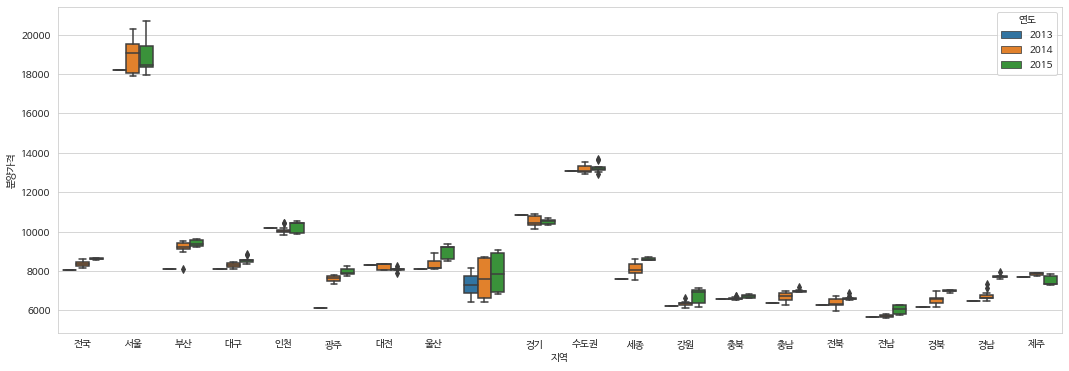

In [168]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도');

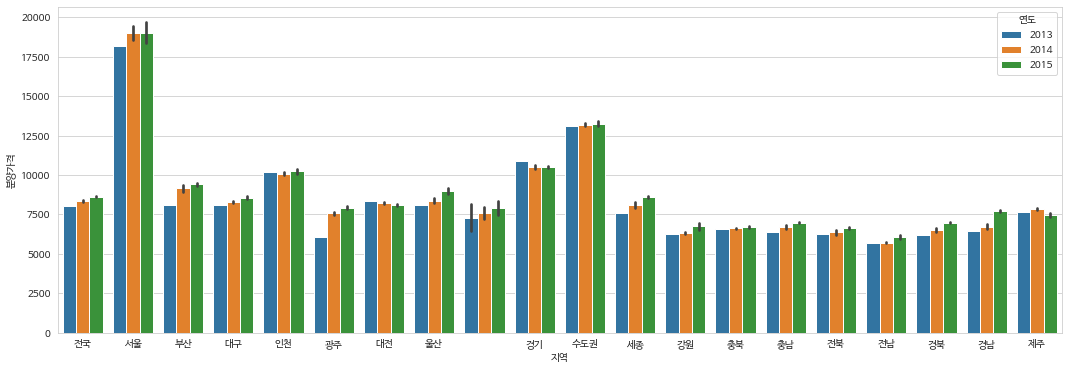

In [170]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도');

In [179]:
df_2013_2015.isnull().sum()

지역      0
기간      0
분양가     0
연도      0
월       0
분양가격    0
dtype: int64

### 이제 2013년부터 2019년까지 데이터를 합칠 준비가 됨

In [180]:
df_2015_2019 = pre_sale[pre_sale['규모구분'] == '전체']
print(df_2013_2015.shape)
df_2015_2019

(462, 6)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841",19275
5,인천,전체,2015,10,3163,"3,163",10437
10,경기,전체,2015,10,3138,"3,138",10355
15,부산,전체,2015,10,3112,"3,112",10269
20,대구,전체,2015,10,2682,"2,682",8850
...,...,...,...,...,...,...,...
4310,전북,전체,2019,12,2468,"2,468",8144
4315,전남,전체,2019,12,2452,"2,452",8091
4320,경북,전체,2019,12,2914,"2,914",9616
4325,경남,전체,2019,12,3063,"3,063",10107


In [181]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [182]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [183]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [184]:
df_2015_2019.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [185]:
df_2015_2019_prepare = df_2015_2019[['지역명', '연도', '월', '평당분양가격']]
df_2015_2019_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275
5,인천,2015,10,10437
10,경기,2015,10,10355
15,부산,2015,10,10269
20,대구,2015,10,8850


In [186]:
df_2015_2019_prepare.describe()

,평당분양가격
count,841
mean,"10,276"
std,"3,739"
min,"6,299"
25%,"7,788"
50%,"9,527"
75%,"11,411"
max,"26,730"


In [187]:
df_2013_2019 = pd.concat([df_2013_2015_prepare, df_2015_2019_prepare])
df_2013_2019.shape

(1303, 4)

In [188]:
df_2013_2019.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [189]:
df_2013_2019.tail()

,지역명,연도,월,평당분양가격
4310,전북,2019,12,8144
4315,전남,2019,12,8091
4320,경북,2019,12,9616
4325,경남,2019,12,10107
4330,제주,2019,12,12810


In [190]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [191]:
df_2015_2019_region = df_2015_2019_prepare['지역명'].unique()
df_2015_2019_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [193]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2019_region]
exclude_region

['전국', '', '수도권']

In [194]:
df_2013_2019.shape

(1303, 4)

In [204]:
df_2013_2019.loc[df_2013_2019['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
10,수도권,2013,12,13083
21,전국,2014,1,8130
31,수도권,2014,1,12995
42,전국,2014,2,8195


In [205]:
df_2013_2019.drop(
    df_2013_2019.loc[df_2013_2019['지역명'].str.match('전국|수도권')].index,
    axis=0,
    inplace=True)
df_2013_2019.drop(
    df_2013_2019.loc[df_2013_2019['지역명'] == ''].index,
    axis=0,
    inplace=True)

In [206]:
df_2013_2019.loc[df_2013_2019['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격


### 2013년 12월 ~ 2019년 전국 신규 민간 아파트 분양가격 동향 시각화

In [207]:
# 판다스로 시각화하기
df_year_mean = df_2013_2019.groupby(['연도'])['평당분양가격'].mean()
df_year_mean

연도
2013    8,059
2014    8,362
2015    8,667
2016    9,321
2017    9,901
2018   10,675
2019   11,602
Name: 평당분양가격, dtype: float64

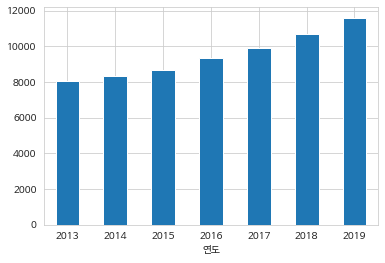

In [209]:
df_year_mean.plot.bar(rot=0);

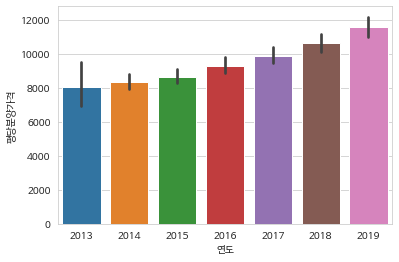

In [210]:
sns.barplot(data=df_2013_2019, x='연도', y='평당분양가격');

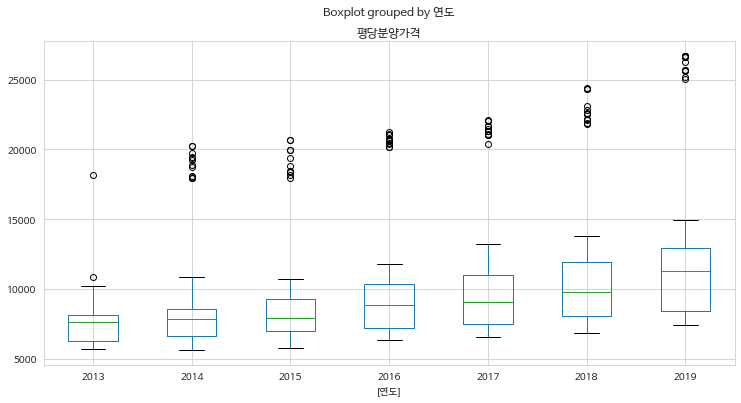

In [214]:
df_2013_2019[['연도', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6));

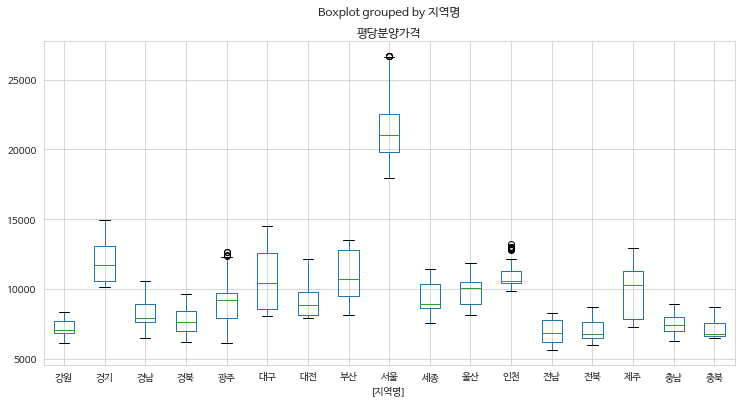

In [215]:
df_2013_2019[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(12, 6));

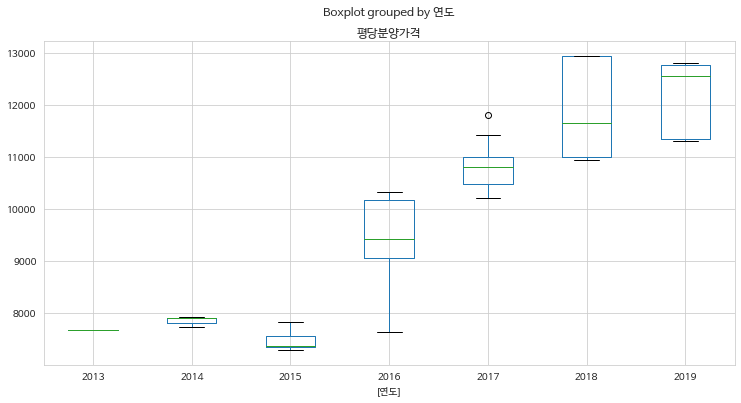

In [216]:
df_2013_2019_jeju = df_2013_2019[df_2013_2019['지역명'] == '제주']
df_2013_2019_jeju[['연도', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6));

In [217]:
df_2013_2019_jeju['연도'].value_counts()

2019    12
2015    12
2014    12
2018    12
2017    11
2016    10
2013     1
Name: 연도, dtype: int64